In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('/content/youtube_tech_channels_20251120_133753.csv')
df2 = pd.read_csv('/content/youtube_tech_videos_20251120_133004.csv')

In [4]:
df


,channel_id,channel_name,description,subscribers,total_views,total_videos,created_date,country,uploads_playlist,scraped_at
0,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,"Linus Tech Tips is a passionate team of ""profe...",16600000,9092244390,6989,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,2025-11-20T13:37:53.306286
1,UCWv7vMbMWH4-V0ZXdmDpPBA,Programming with Mosh,"Hi! I'm Mosh 👋, a software engineer with over ...",4860000,257598451,243,2014-10-07T00:40:53Z,US,UUWv7vMbMWH4-V0ZXdmDpPBA,2025-11-20T13:37:53.306286
2,UChIZGfcnjHI0DG4nweWEduw,TechSource,Join the Discord Server:\nhttps://discord.gg/T...,4010000,870967915,1897,2010-01-24T22:34:11Z,US,UUhIZGfcnjHI0DG4nweWEduw,2025-11-20T13:37:53.306286
3,UC4SVo0Ue36XCfOyb5Lh1viQ,Bro Code,Coding bootcamps HATE HIM! 🗿\n,2990000,178609297,1000,2019-10-10T14:40:46.568078Z,US,UU4SVo0Ue36XCfOyb5Lh1viQ,2025-11-20T13:37:53.306286
4,UCVeW9qkBjo3zosnqUbG7CFw,John Hammond,Free Cybersecurity Education and Ethical Hacking.,2080000,82120292,1740,2011-02-06T03:59:46Z,US,UUVeW9qkBjo3zosnqUbG7CFw,2025-11-20T13:37:53.306286
...,...,...,...,...,...,...,...,...,...,...
125,UCBKM3HATRILZyG9jGNJKGXQ,Software Engineering Daily,The world through the lens of software. \n\n🎙️...,11400,302138,1138,2017-05-19T21:45:38Z,US,UUBKM3HATRILZyG9jGNJKGXQ,2025-11-20T13:37:53.306286
126,UCvckuc-3Sos1aUtSqCV_0xw,Georgia Web Development,"Georgia Web Development is a Moultrie, Georgia...",11200,6878757,212,2014-03-17T20:28:26Z,US,UUvckuc-3Sos1aUtSqCV_0xw,2025-11-20T13:37:53.306286
127,UC4lM4hz_v5ixNjK54UwPEVw,Machine Learning and AI Academy,"Welcome to Machine Learning and AI Academy, yo...",11000,130381,60,2019-12-26T13:37:41.612225Z,GB,UU4lM4hz_v5ixNjK54UwPEVw,2025-11-20T13:37:53.306286
128,UCTnOFmMwZIi7jJYS_nAfeyQ,The Helpful Hacker,Welcome to The Helpful Hacker! I’m a passionat...,10900,587499,64,2024-06-17T17:08:58.598812Z,US,UUTnOFmMwZIi7jJYS_nAfeyQ,2025-11-20T13:37:53.306286


In [5]:
df2

,video_id,title,published_at,views,likes,comments,duration,thumbnail,video_url,channel_id,channel_name,scraped_at,duration_readable
0,zzlS5dtzKKA,Most Important LTTStore Step,2025-11-18T22:47:05Z,211782,4012,88,PT27S,https://i.ytimg.com/vi/zzlS5dtzKKA/hqdefault.jpg,https://www.youtube.com/watch?v=zzlS5dtzKKA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:27
1,Cmnfwabz0bA,This TV Factory is the Coolest I’ve Ever Seen,2025-11-18T19:20:33Z,572162,29769,1876,PT13M43S,https://i.ytimg.com/vi/Cmnfwabz0bA/hqdefault.jpg,https://www.youtube.com/watch?v=Cmnfwabz0bA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,13:43
2,dnKy4UEdiyo,The Hardest Secrets I’ve Ever Kept - WAN Show ...,2025-11-15T06:24:56Z,523009,10052,1798,PT4H30M52S,https://i.ytimg.com/vi/dnKy4UEdiyo/hqdefault.jpg,https://www.youtube.com/watch?v=dnKy4UEdiyo,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,4:30:52
3,WP3LKBHL8vQ,Correct Way to Apply Thermal Paste,2025-11-14T18:27:41Z,3002514,63873,514,PT34S,https://i.ytimg.com/vi/WP3LKBHL8vQ/hqdefault.jpg,https://www.youtube.com/watch?v=WP3LKBHL8vQ,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:34
4,g3FkuZNSGkw,Valve’s New Console and Controller - STEAM Mac...,2025-11-13T13:54:48Z,4399002,161897,11391,PT14M31S,https://i.ytimg.com/vi/g3FkuZNSGkw/hqdefault.jpg,https://www.youtube.com/watch?v=g3FkuZNSGkw,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,14:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Vhr76IouKPc,Big O Time Complexity | Concepts You Should Know!,2024-08-16T16:57:51Z,1025,39,11,PT4M59S,https://i.ytimg.com/vi/Vhr76IouKPc/hqdefault.jpg,https://www.youtube.com/watch?v=Vhr76IouKPc,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,4:59
1296,sFX8EVl7-QQ,5 Uncommon Project Ideas for Backend Engineers,2024-08-07T18:19:59Z,8301,404,25,PT9M58S,https://i.ytimg.com/vi/sFX8EVl7-QQ/hqdefault.jpg,https://www.youtube.com/watch?v=sFX8EVl7-QQ,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,9:58
1297,UFryLbNfu5U,Spring-Boot + Chat GPT in Action!,2024-05-27T18:58:13Z,1796,48,4,PT7M55S,https://i.ytimg.com/vi/UFryLbNfu5U/hqdefault.jpg,https://www.youtube.com/watch?v=UFryLbNfu5U,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,7:55
1298,JtLvk2Ky2W0,Kubernetes in 60 Seconds,2024-02-24T20:40:50Z,2677,73,4,PT1M6S,https://i.ytimg.com/vi/JtLvk2Ky2W0/hqdefault.jpg,https://www.youtube.com/watch?v=JtLvk2Ky2W0,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,1:06


In [6]:
df.head()

,channel_id,channel_name,description,subscribers,total_views,total_videos,created_date,country,uploads_playlist,scraped_at
0,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,"Linus Tech Tips is a passionate team of ""profe...",16600000,9092244390,6989,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,2025-11-20T13:37:53.306286
1,UCWv7vMbMWH4-V0ZXdmDpPBA,Programming with Mosh,"Hi! I'm Mosh 👋, a software engineer with over ...",4860000,257598451,243,2014-10-07T00:40:53Z,US,UUWv7vMbMWH4-V0ZXdmDpPBA,2025-11-20T13:37:53.306286
2,UChIZGfcnjHI0DG4nweWEduw,TechSource,Join the Discord Server:\nhttps://discord.gg/T...,4010000,870967915,1897,2010-01-24T22:34:11Z,US,UUhIZGfcnjHI0DG4nweWEduw,2025-11-20T13:37:53.306286
3,UC4SVo0Ue36XCfOyb5Lh1viQ,Bro Code,Coding bootcamps HATE HIM! 🗿\n,2990000,178609297,1000,2019-10-10T14:40:46.568078Z,US,UU4SVo0Ue36XCfOyb5Lh1viQ,2025-11-20T13:37:53.306286
4,UCVeW9qkBjo3zosnqUbG7CFw,John Hammond,Free Cybersecurity Education and Ethical Hacking.,2080000,82120292,1740,2011-02-06T03:59:46Z,US,UUVeW9qkBjo3zosnqUbG7CFw,2025-11-20T13:37:53.306286


In [7]:
df2.head()

,video_id,title,published_at,views,likes,comments,duration,thumbnail,video_url,channel_id,channel_name,scraped_at,duration_readable
0,zzlS5dtzKKA,Most Important LTTStore Step,2025-11-18T22:47:05Z,211782,4012,88,PT27S,https://i.ytimg.com/vi/zzlS5dtzKKA/hqdefault.jpg,https://www.youtube.com/watch?v=zzlS5dtzKKA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:27
1,Cmnfwabz0bA,This TV Factory is the Coolest I’ve Ever Seen,2025-11-18T19:20:33Z,572162,29769,1876,PT13M43S,https://i.ytimg.com/vi/Cmnfwabz0bA/hqdefault.jpg,https://www.youtube.com/watch?v=Cmnfwabz0bA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,13:43
2,dnKy4UEdiyo,The Hardest Secrets I’ve Ever Kept - WAN Show ...,2025-11-15T06:24:56Z,523009,10052,1798,PT4H30M52S,https://i.ytimg.com/vi/dnKy4UEdiyo/hqdefault.jpg,https://www.youtube.com/watch?v=dnKy4UEdiyo,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,4:30:52
3,WP3LKBHL8vQ,Correct Way to Apply Thermal Paste,2025-11-14T18:27:41Z,3002514,63873,514,PT34S,https://i.ytimg.com/vi/WP3LKBHL8vQ/hqdefault.jpg,https://www.youtube.com/watch?v=WP3LKBHL8vQ,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:34
4,g3FkuZNSGkw,Valve’s New Console and Controller - STEAM Mac...,2025-11-13T13:54:48Z,4399002,161897,11391,PT14M31S,https://i.ytimg.com/vi/g3FkuZNSGkw/hqdefault.jpg,https://www.youtube.com/watch?v=g3FkuZNSGkw,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,14:31


In [8]:
df.shape

(130, 10)

In [9]:
df2.shape

(1300, 13)

In [10]:
df.columns

Index(['channel_id', 'channel_name', 'description', 'subscribers',
       'total_views', 'total_videos', 'created_date', 'country',
       'uploads_playlist', 'scraped_at'],
      dtype='object')

In [11]:
df2.columns

Index(['video_id', 'title', 'published_at', 'views', 'likes', 'comments',
       'duration', 'thumbnail', 'video_url', 'channel_id', 'channel_name',
       'scraped_at', 'duration_readable'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
channel_id,0
channel_name,0
description,3
subscribers,0
total_views,0
total_videos,0
created_date,0
country,14
uploads_playlist,0
scraped_at,0


In [13]:
df2.isnull().sum()

,0
video_id,0
title,0
published_at,0
views,0
likes,0
comments,0
duration,0
thumbnail,0
video_url,0
channel_id,0


In [14]:
# Converting dates to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df2['published_at'] = pd.to_datetime(df2['published_at'], errors='coerce')

In [15]:
# Handle missing country
df['country'] = df['country'].fillna('Unknown')

In [16]:
df['country'].unique()

array(['CA', 'US', 'Unknown', 'DK', 'SG', 'HR', 'KE', 'GB', 'IN', 'IE',
       'JP', 'NO', 'BG', 'AU', 'AE', 'RU', 'PH', 'ID', 'ES', 'MT', 'BR',
       'DE', 'PK', 'FI', 'AT'], dtype=object)

In [17]:
# Converting numeric columns properly
num_cols_df = ['subscribers', 'total_views', 'total_videos']
df[num_cols_df] = df[num_cols_df].apply(pd.to_numeric, errors='coerce')

num_cols_df2 = ['views', 'likes', 'comments']
df2[num_cols_df2] = df2[num_cols_df2].apply(pd.to_numeric, errors='coerce')

In [18]:
# Converting duration_readable to seconds
df2['duration_seconds'] = pd.to_timedelta(df2['duration'], errors='coerce').dt.total_seconds()

In [19]:
df2

,video_id,title,published_at,views,likes,comments,duration,thumbnail,video_url,channel_id,channel_name,scraped_at,duration_readable,duration_seconds
0,zzlS5dtzKKA,Most Important LTTStore Step,2025-11-18 22:47:05+00:00,211782,4012,88,PT27S,https://i.ytimg.com/vi/zzlS5dtzKKA/hqdefault.jpg,https://www.youtube.com/watch?v=zzlS5dtzKKA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:27,27.0
1,Cmnfwabz0bA,This TV Factory is the Coolest I’ve Ever Seen,2025-11-18 19:20:33+00:00,572162,29769,1876,PT13M43S,https://i.ytimg.com/vi/Cmnfwabz0bA/hqdefault.jpg,https://www.youtube.com/watch?v=Cmnfwabz0bA,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,13:43,823.0
2,dnKy4UEdiyo,The Hardest Secrets I’ve Ever Kept - WAN Show ...,2025-11-15 06:24:56+00:00,523009,10052,1798,PT4H30M52S,https://i.ytimg.com/vi/dnKy4UEdiyo/hqdefault.jpg,https://www.youtube.com/watch?v=dnKy4UEdiyo,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,4:30:52,16252.0
3,WP3LKBHL8vQ,Correct Way to Apply Thermal Paste,2025-11-14 18:27:41+00:00,3002514,63873,514,PT34S,https://i.ytimg.com/vi/WP3LKBHL8vQ/hqdefault.jpg,https://www.youtube.com/watch?v=WP3LKBHL8vQ,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,0:34,34.0
4,g3FkuZNSGkw,Valve’s New Console and Controller - STEAM Mac...,2025-11-13 13:54:48+00:00,4399002,161897,11391,PT14M31S,https://i.ytimg.com/vi/g3FkuZNSGkw/hqdefault.jpg,https://www.youtube.com/watch?v=g3FkuZNSGkw,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,2025-11-20T13:37:53.306773,14:31,871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Vhr76IouKPc,Big O Time Complexity | Concepts You Should Know!,2024-08-16 16:57:51+00:00,1025,39,11,PT4M59S,https://i.ytimg.com/vi/Vhr76IouKPc/hqdefault.jpg,https://www.youtube.com/watch?v=Vhr76IouKPc,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,4:59,299.0
1296,sFX8EVl7-QQ,5 Uncommon Project Ideas for Backend Engineers,2024-08-07 18:19:59+00:00,8301,404,25,PT9M58S,https://i.ytimg.com/vi/sFX8EVl7-QQ/hqdefault.jpg,https://www.youtube.com/watch?v=sFX8EVl7-QQ,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,9:58,598.0
1297,UFryLbNfu5U,Spring-Boot + Chat GPT in Action!,2024-05-27 18:58:13+00:00,1796,48,4,PT7M55S,https://i.ytimg.com/vi/UFryLbNfu5U/hqdefault.jpg,https://www.youtube.com/watch?v=UFryLbNfu5U,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,7:55,475.0
1298,JtLvk2Ky2W0,Kubernetes in 60 Seconds,2024-02-24 20:40:50+00:00,2677,73,4,PT1M6S,https://i.ytimg.com/vi/JtLvk2Ky2W0/hqdefault.jpg,https://www.youtube.com/watch?v=JtLvk2Ky2W0,UCHd1qamEkVSlTWkEqIqJbEQ,Visual Computer Science,2025-11-20T13:37:53.306773,1:06,66.0


In [20]:
df2[df2['views'] == 0]

,video_id,title,published_at,views,likes,comments,duration,thumbnail,video_url,channel_id,channel_name,scraped_at,duration_readable,duration_seconds
40,XKhJaksO9HI,Career Questions with Rob Fuller @mubix!,2025-11-18 21:29:46+00:00,0,6,0,P0D,https://i.ytimg.com/vi/XKhJaksO9HI/hqdefault_l...,https://www.youtube.com/watch?v=XKhJaksO9HI,UCVeW9qkBjo3zosnqUbG7CFw,John Hammond,2025-11-20T13:37:53.306773,P0D,0.0
98,RMnZuoozZ5w,App Performance #AskAndroid | Spotlight Week,2025-11-12 16:30:24+00:00,0,15,0,P0D,https://i.ytimg.com/vi/RMnZuoozZ5w/hqdefault_l...,https://www.youtube.com/watch?v=RMnZuoozZ5w,UCVHFbqXqoYvEWM1Ddxl0QDg,Android Developers,2025-11-20T13:37:53.306773,P0D,0.0
576,F4k93KxLAxQ,Saddle up for success: Inside the ReArchitectu...,2025-11-17 05:21:26+00:00,0,0,0,P0D,https://i.ytimg.com/vi/F4k93KxLAxQ/hqdefault_l...,https://www.youtube.com/watch?v=F4k93KxLAxQ,UCdoadna9HFHsxXWhafhNvKw,AWS Events,2025-11-20T13:37:53.306773,P0D,0.0
577,_3Yr7uFIn7Y,MariaDB: Innovation & Vision with Creator Mont...,2025-11-17 05:11:59+00:00,0,2,0,P0D,https://i.ytimg.com/vi/_3Yr7uFIn7Y/hqdefault_l...,https://www.youtube.com/watch?v=_3Yr7uFIn7Y,UCdoadna9HFHsxXWhafhNvKw,AWS Events,2025-11-20T13:37:53.306773,P0D,0.0
578,8HaKO0Lw6Us,A FinOps guide to re:Invent 2025 | The Keys to...,2025-11-14 11:44:19+00:00,0,4,0,P0D,https://i.ytimg.com/vi/8HaKO0Lw6Us/hqdefault_l...,https://www.youtube.com/watch?v=8HaKO0Lw6Us,UCdoadna9HFHsxXWhafhNvKw,AWS Events,2025-11-20T13:37:53.306773,P0D,0.0
1020,qcxgukkmJjg,anywidget: Jupyter Widgets made easy - Talk Py...,2025-10-30 14:13:49+00:00,0,0,0,P0D,https://i.ytimg.com/vi/qcxgukkmJjg/hqdefault_l...,https://www.youtube.com/watch?v=qcxgukkmJjg,UCKPSmMfDsXTKrCZApukcJ7A,Talk Python,2025-11-20T13:37:53.306773,P0D,0.0


In [21]:
df.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   channel_id        130 non-null    object             
 1   channel_name      130 non-null    object             
 2   description       127 non-null    object             
 3   subscribers       130 non-null    int64              
 4   total_views       130 non-null    int64              
 5   total_videos      130 non-null    int64              
 6   created_date      89 non-null     datetime64[ns, UTC]
 7   country           130 non-null    object             
 8   uploads_playlist  130 non-null    object             
 9   scraped_at        130 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 10.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   

In [22]:
# Checking for the title column for cleaning
df2['title'].head(100)

,title
0,Most Important LTTStore Step
1,This TV Factory is the Coolest I’ve Ever Seen
2,The Hardest Secrets I’ve Ever Kept - WAN Show ...
3,Correct Way to Apply Thermal Paste
4,Valve’s New Console and Controller - STEAM Mac...
...,...
95,App Performance | Spotlight Week
96,Android developer verification walkthrough
97,"Now in Android: 122 – Android Studio updates, ..."
98,App Performance #AskAndroid | Spotlight Week


In [23]:
# Removing spaces
df2['title'] = df2['title'].str.strip()

In [24]:
# For encoding issues
df2['title'] = (
    df2['title']
    .str.encode('latin1', errors='ignore')
    .str.decode('utf-8', errors='ignore')
)

In [25]:
# Removing emojis & non-text symbols
df2['title'] = df2['title'].apply(
    lambda x: re.sub(r'[^\x00-\x7F]+', '', x) if isinstance(x, str) else x
)

In [26]:
# Normalizing Spacing
df2['title'] = df2['title'].str.replace(r'\s+', ' ', regex=True)

In [27]:
df2['title'].head(10)

,title
0,Most Important LTTStore Step
1,This TV Factory is the Coolest Ive Ever Seen
2,The Hardest Secrets Ive Ever Kept - WAN Show N...
3,Correct Way to Apply Thermal Paste
4,Valves New Console and Controller - STEAM Mach...
5,Every Other VR Headset is Obsolete Now - Steam...
6,When you do such a bad job the company flies a...
7,The $1600 All-MSRP Gaming PC
8,1 Subscriber = $1 from Linus Wallet
9,Liquid Metal Killed my Laptop Now What?


# **Channel Level Analysis**

In [28]:
#Top 10 channels by subscribers
top10_subs = (
    df[['channel_name','subscribers']].
    sort_values(by= 'subscribers',ascending=False)
    .head(10)
)

top10_subs


,channel_name,subscribers
0,Linus Tech Tips,16600000
1,Programming with Mosh,4860000
2,TechSource,4010000
3,Bro Code,2990000
4,John Hammond,2080000
5,TechLinked,1990000
6,The Coding Train,1750000
7,Paul's Hardware,1530000
8,Corey Schafer,1490000
9,Android Developers,1400000


#Insight
Above are the most influential tech channels, Useful for brand reach & popularity

In [29]:
top10_views =(
    df[['channel_name', 'total_views']].
    sort_values(by ='total_views', ascending = False)
    .head(10)
    )

top10_views

,channel_name,total_views
0,Linus Tech Tips,9092244390
9,Android Developers,1247156348
2,TechSource,870967915
5,TechLinked,628661984
15,MobileTechReview,309863327
7,Paul's Hardware,293634526
1,Programming with Mosh,257598451
11,MrMobile [Michael Fisher],250689795
18,Amazon Web Services,197934117
3,Bro Code,178609297


#Insight
Some channels may have fewer subscribers but they have massive lifetime views which shows long-term content consumption

In [30]:
# Which channel has uploaded the most videos?
df.loc[df['total_videos'].idxmax(),
       ['channel_name', 'total_videos']]

,18
channel_name,Amazon Web Services
total_videos,18375


In [31]:
#  Average subscribers per channel..
avg_subscribers = df['subscribers'].mean()
round(avg_subscribers,2)

np.float64(512343.85)

In [32]:
#  Average total views per channel.
Avg_views = df['total_views'].mean()
round(Avg_views,2)

np.float64(123715522.78)

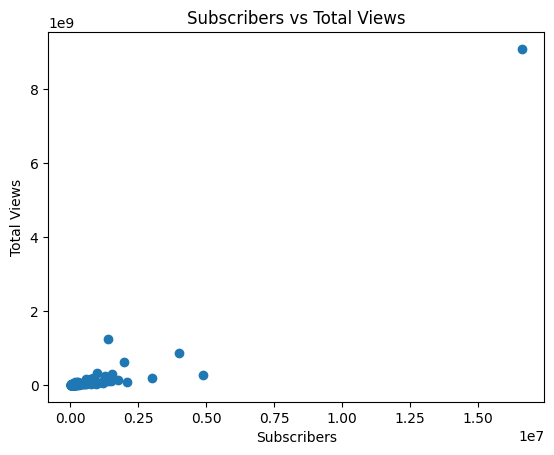

In [33]:
# Relationship between subscribers and total views.
plt.figure()
plt.scatter(df['subscribers'], df['total_views'])
plt.xlabel('Subscribers')
plt.ylabel('Total Views')
plt.title('Subscribers vs Total Views')
plt.show()


In [34]:
df[['subscribers', 'total_views']].corr()

,subscribers,total_views
subscribers,1.000000,0.931706
total_views,0.931706,1.000000


Above analysis shows a very strong positive correlation (0.93) between subscriber count and total views, indicating that larger channels generally accumulate more lifetime views. However, the relationship is influenced by a small number of very large channels

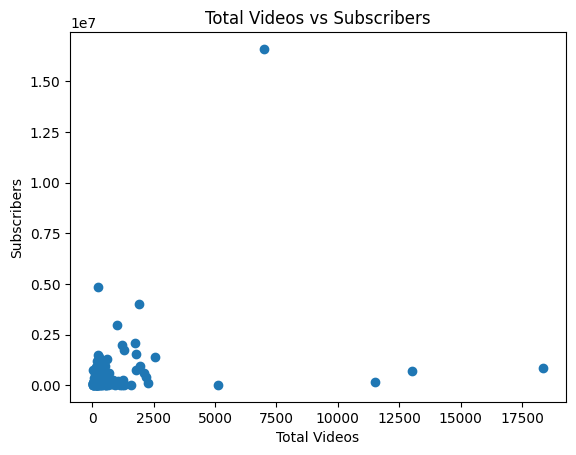

In [35]:
# Does higher video count guarantee higher subscribers?
plt.figure()
plt.scatter(df['total_videos'], df['subscribers'])
plt.xlabel('Total Videos')
plt.ylabel('Subscribers')
plt.title('Total Videos vs Subscribers')
plt.show()


In [36]:
df[['total_videos', 'subscribers']].corr()

,total_videos,subscribers
total_videos,1.000000,0.256838
subscribers,0.256838,1.000000


Above correlation between total videos uploaded and subscriber count is weak (0.26), indicating that uploading more videos does not guarantee higher subscriber growth. Content quality and relevance play a more significant role than upload volume.

# **Video Level Analysis**

In [37]:
#Total videos per channel.
video_per_channel = (
    df2.groupby('channel_name').size()
    .reset_index(name='videos_count')
    .sort_values(by='videos_count', ascending = False)
)
video_per_channel.head(10
                       )

,channel_name,videos_count
0,365 Data Science,10
1,AWS Events,10
2,AWS Partner Network,10
3,AWS with Chetan,10
4,"All Things JavaScript, LLC",10
5,Amazon Web Services,10
6,Android Developers,10
7,Android Knowledge,10
8,Apple Developer,10
9,BRO COOLING,10


In [38]:
# Top 10 videos by views
top10_views = (
    df2[['title','channel_name','views']]
    .sort_values(by='views', ascending=False)
    .head(10)
)
top10_views


,title,channel_name,views
99,Top 4 agentic experiences for Gemini in Androi...,Android Developers,79601182
214,HTML & CSS Full Course - Beginner to Pro,SuperSimpleDev,17244882
199,The Carpenter Who Outsmarted Newton,Python Programmer,10335657
212,JavaScript Tutorial Full Course - Beginner to Pro,SuperSimpleDev,7215304
4,Valves New Console and Controller - STEAM Mach...,Linus Tech Tips,4399002
193,The Railway Engineer who Saved London from Poo!,Python Programmer,3988656
5,Every Other VR Headset is Obsolete Now - Steam...,Linus Tech Tips,3540634
8,1 Subscriber = $1 from Linus Wallet,Linus Tech Tips,3367520
3,Correct Way to Apply Thermal Paste,Linus Tech Tips,3002514
213,How to put an HTML website online (on the Inte...,SuperSimpleDev,2440990


In [39]:
# Top 10 videos by likes
top10_likes_videos =(
    df2[['title','channel_name','likes']]
    .sort_values(by= 'likes', ascending=False)
    .head(10)
)

top10_likes_videos

,title,channel_name,likes
199,The Carpenter Who Outsmarted Newton,Python Programmer,477913
214,HTML & CSS Full Course - Beginner to Pro,SuperSimpleDev,313427
190,The Housewife Who Invented AI...in 1843!,Python Programmer,236139
99,Top 4 agentic experiences for Gemini in Androi...,Android Developers,164140
4,Valves New Console and Controller - STEAM Mach...,Linus Tech Tips,161897
5,Every Other VR Headset is Obsolete Now - Steam...,Linus Tech Tips,160481
212,JavaScript Tutorial Full Course - Beginner to Pro,SuperSimpleDev,144646
193,The Railway Engineer who Saved London from Poo!,Python Programmer,138325
8,1 Subscriber = $1 from Linus Wallet,Linus Tech Tips,113238
215,Backend web development - a complete overview,SuperSimpleDev,102764


In [40]:
# Videos with high engagement but low views
df2['engagement_rate'] = (df2['likes'] + df2['comments']) / df2['views']

In [41]:
low_views_threshold = df2['views'].median()
high_engagement_threshold = df2['engagement_rate'].quantile(0.75)

high_eng_low_view = df2[
    (df2['views'] < low_views_threshold) &
    (df2['engagement_rate'] > high_engagement_threshold)
][['title', 'channel_name', 'views', 'likes', 'comments', 'engagement_rate']]

high_eng_low_view.head(10)


,title,channel_name,views,likes,comments,engagement_rate
32,Useful NumPy functions you should know!,Bro Code,3215,174,16,0.059098
40,Career Questions with Rob Fuller @mubix!,John Hammond,0,6,0,inf
98,App Performance #AskAndroid | Spotlight Week,Android Developers,0,15,0,inf
202,React 19 Tutorial - 14 - Styling React Components,Codevolution,949,55,6,0.064278
204,React 19 Tutorial - 12 - Lists and Keys,Codevolution,898,54,1,0.061247
205,React 19 Tutorial - 11 - Rendering Lists,Codevolution,1134,67,3,0.061728
206,React 19 Tutorial - 10 - Conditional Rendering,Codevolution,2113,106,8,0.053952
208,React 19 Tutorial - 8 - Props,Codevolution,1650,83,8,0.055152
240,Khadas Mind 2 Mini PC + RTX 4060 Ti Dock = Por...,Chigz Tech Reviews,612,51,30,0.132353
330,Simplify Network Automation with Cisco Crosswo...,Cisco,318,18,2,0.062893


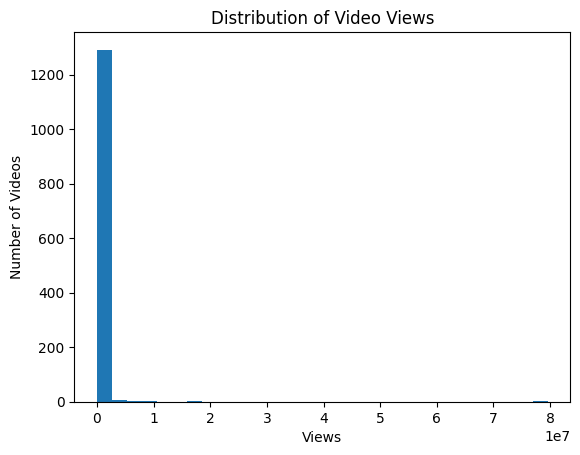

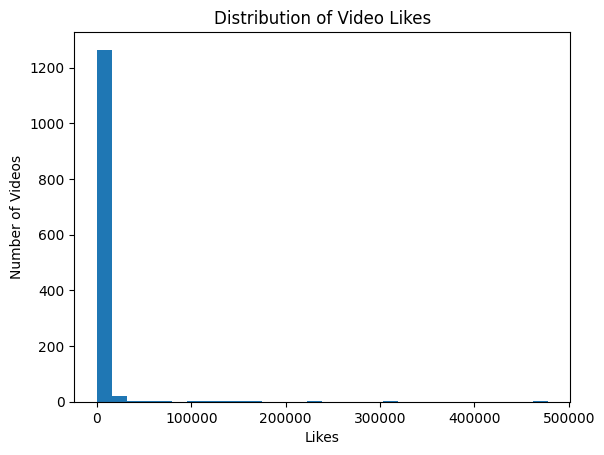

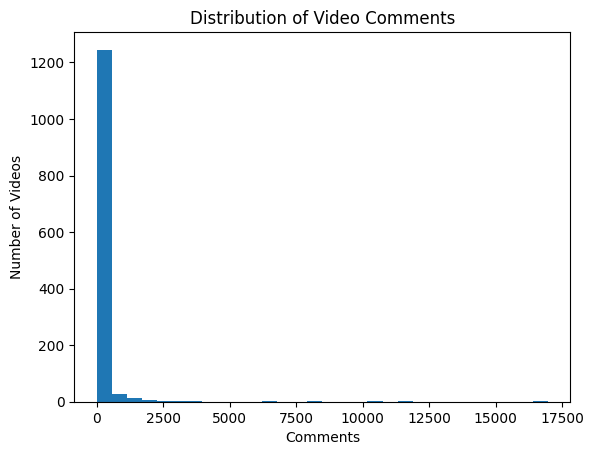

In [42]:
# Distribution of views, likes, comments
plt.figure()
plt.hist(df2['views'], bins=30)
plt.xlabel('Views')
plt.ylabel('Number of Videos')
plt.title('Distribution of Video Views')
plt.show()


plt.figure()
plt.hist(df2['likes'], bins=30)
plt.xlabel('Likes')
plt.ylabel('Number of Videos')
plt.title('Distribution of Video Likes')
plt.show()


plt.figure()
plt.hist(df2['comments'], bins=30)
plt.xlabel('Comments')
plt.ylabel('Number of Videos')
plt.title('Distribution of Video Comments')
plt.show()


In [43]:
# Average video duration
avg_duration_seconds = df2['duration_seconds'].mean()
round(avg_duration_seconds,2)


np.float64(1798.32)

# **Channel Efficiency Analysis**

In [52]:
# Views per video per channel.
valid_videos = df2[df2['views'] > 0].copy()

In [54]:
views_per_video_channel = (
    valid_videos
    .groupby(['channel_id', 'channel_name'])
    .agg(
        avg_views_per_video=('views', 'mean'),
        videos_in_dataset=('views', 'count')
    )
    .reset_index()
    .sort_values(by='avg_views_per_video', ascending=False)
)

views_per_video_channel.head(10)

,channel_id,channel_name,avg_views_per_video,videos_in_dataset
67,UCVHFbqXqoYvEWM1Ddxl0QDg,Android Developers,8.848599e+06,9
27,UCB6dvaWu0N8uVq2yKsZ5s5g,SuperSimpleDev,3.069242e+06,10
74,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,1.847990e+06,10
18,UC68KSmHePPePCjW4v57VPQg,Python Programmer,1.772706e+06,10
101,UCmtyQOKKmrMVaKuRXz02jbQ,Sebastian Lague,4.850205e+05,10
89,UCeeFfhMcJa1kjtfZAGskOCA,TechLinked,3.726173e+05,10
99,UCmXmlB4-HJytD7wek0Uo97A,JavaScript Mastery,2.256795e+05,10
61,UCSOpcUkE-is7u7c4AkLgqTw,MrMobile [Michael Fisher],2.030764e+05,10
93,UChIZGfcnjHI0DG4nweWEduw,TechSource,1.518378e+05,10
19,UC6Jxh95N32m1JvKG_-fQ6QQ,OzTalksHW,1.405367e+05,10


In [55]:
# Subscribers per video.
valid_channels = df[df['total_videos'] > 0].copy()

In [56]:
# Calculating subscribers per video
valid_channels['subscribers_per_video'] = (
    valid_channels['subscribers'] / valid_channels['total_videos']
)

In [57]:
# View top channels by this metric
subs_per_video = (
    valid_channels[['channel_name', 'subscribers', 'total_videos', 'subscribers_per_video']]
    .sort_values(by='subscribers_per_video', ascending=False)
)

subs_per_video.head(10)

,channel_name,subscribers,total_videos,subscribers_per_video
21,SuperSimpleDev,742000,36,20611.111111
1,Programming with Mosh,4860000,243,20000.000000
66,Software Engineering - ALX,120000,13,9230.769231
13,JavaScript Mastery,1190000,186,6397.849462
8,Corey Schafer,1490000,254,5866.141732
17,CRATER,915000,165,5545.454545
27,Coder Coder,537000,105,5114.285714
36,NetworKing,337000,67,5029.850746
10,Sebastian Lague,1380000,291,4742.268041
19,Python Programmer,761000,225,3382.222222
